# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS
## Week 0 - Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Finite difference methods

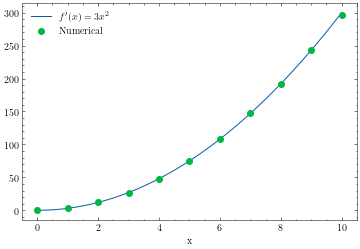

In [3]:
dx = 0.1
x = np.arange(0, 10+dx, dx)
f = x**3

# First derivative

dfdx = np.zeros(len(f))

# First step with forward difference
dfdx[0] = (f[1] - f[0])/dx 

# Mid steps with central difference
for i in range(1, len(f)-1):
    dfdx[i] = (f[i+1] - f[i-1])/(2*dx)

# Last step with backward difference    
dfdx[-1] = (f[-1] - f[-2])/dx 

plt.plot(x, 3*x**2, label="$f'(x) = 3x^2$")
plt.plot(x[::10], dfdx[::10], marker='o', ls='', label='Numerical')
plt.xlabel('x')
plt.legend()
plt.show()

In [4]:
# Widgets

# Root finding

### Relaxation Method for non-linear equations

We aim to solve

\begin{equation}
x + e^{-2x} = 1.
\end{equation}

We could rewrite this equation in the form of $x = f(x)$ and iterate until we find a convergent $x_0$ value. One possibility is

\begin{equation}
x  = 1 + e^{-2x}, 
\end{equation}
in this form, $f(x) = 1 + e^{-2x}$.

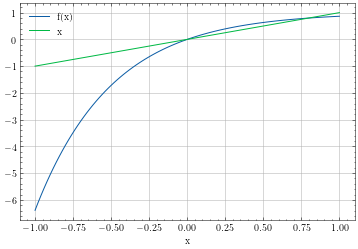

In [7]:
# Inspecting the problem graphically

def f(x):
    return 1 - np.exp(-2*x)

x = np.linspace(-1, 1, 101)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, x, label='x')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

In [8]:
# Writting our relaxation function

def relaxation_method(f, x0, N=100, tol=1e-6):
    x_old = x0
    for i in range(N):
        x_new = f(x_old)
        if abs(x_new - x_old) < tol:
            print(f'Converged at x = {x_new} after {i+1} iterations.')
            break
        x_old = x_new
    else:
        print(f'Convergence failed. Last x = {x_new}.')

In [9]:
# Looks like we have a solution around x = 0.5

relaxation_method(f, 0.5)

Converged at x = 0.7968118244957711 after 16 iterations.


In [10]:
# The other solution seems to be  around x = 0. But that won't converge with our choice for f(x)

relaxation_method(f, -0.1)

Convergence failed. Last x = -inf.


<ipython-input-7-ef7d999db4a4>:4: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-2*x)
<ipython-input-8-64544049317c>:7: RuntimeWarning: invalid value encountered in double_scalars
  if abs(x_new - x_old) < tol:


Instead, we could make a different choice for f(x):

\begin{equation}
x + e^{-2x} = 1.
\end{equation}

\begin{equation}
x = -\frac{1}{2} \ln(1 - x), 
\end{equation}

in this form, $f(x) = -\frac{1}{2} \ln(1 - x)$.

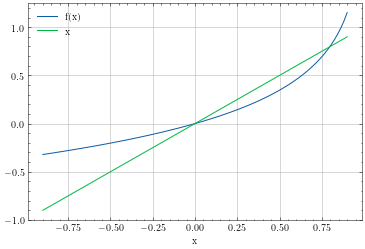

In [11]:
# Inspecting the problem graphically

def f_new(x):
    return -0.5*np.log(1-x)

x = np.linspace(-0.9, 0.9, 101)

plt.plot(x, f_new(x), label='f(x)')
plt.plot(x, x, label='x')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

In [12]:
# Solution around 0.7

relaxation_method(f_new, 0.01)

Converged at x = 6.165233089765411e-07 after 14 iterations.


Why sometimes our method doesn't converge? Let our solution be $x_0 = f(x_0)$ at the $i^{th}$ iteration

\begin{equation}
x_i = f(x_{i-1}).
\end{equation}

Taylor expanding the RHS around $x_0$:

\begin{equation}
x_i = f(x_0) + (x_{i-1} - x_0)f'(x_0) + ...
\end{equation}

but $f(x_0) = x_0$. Defining $\Delta x_i = (x_i - x_0)$,

\begin{equation}
x_i - x_0 \approx (x_{i-1} - x_0)f'(x_0)
\end{equation}

\begin{equation}
\Delta x_i \approx \Delta x_{i-1}f'(x_0)
\end{equation}

\begin{equation}
\frac{\Delta x_i}{\Delta x_{i-1}} \approx f'(x_0)
\end{equation}

Therefore, our result will converge if $|f'(x_0)| < 1$.

In [13]:
# Integration